# Initial exploration

## Data format

To localize the data I hit the "Download All" button on the competition homepage and ran `unzip all.zip -d data` to localize it to the `data` subfolder in this repository.

In [10]:
import pandas as pd
pd.read_csv("../data/train.csv", index_col="id").head()

,rle_mask
id,
575d24d81d,NaN
a266a2a9df,5051 5151
75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


`train.csv` contains the training set masks in a run-length encoded format. A `NaN` corresponds with an image containing no salt deposits whatsoever.

In [11]:
pd.read_csv("../data/depths.csv", index_col="id").head()

,z
id,
4ac19fb269,306
1825fadf99,157
f59821d067,305
5b435fad9d,503
e340e7bfca,783


`depths.csv` contains a single helper variable: the depth of the salt deposit seen in the image.

In [12]:
pd.read_csv("../data/train.csv", index_col="id").shape

(4000, 1)

In [13]:
pd.read_csv("../data/depths.csv", index_col="id").shape

(22000, 1)

`depths.csv` covers the entire dataset, including the test data. `train.csv` contains solely train records. Ther are 4000 train records and 18000 test records. To construct the complete train set, we need to perform an exclusive join on the image IDs in the test set against the depths. To construct the complete test set, we need to do the `XOR` of this operation.

In [14]:
train = pd.read_csv("../data/train.csv", index_col="id", usecols=[0])
_depths = pd.read_csv("../data/depths.csv", index_col="id")
train = train.join(_depths)
test = _depths[~_depths.index.isin(train.index)]
del _depths

In [16]:
test.head()

,z
id,
353e010b7b,264
5439dbbddf,557
71bab9f311,846
52551f7a80,610
512d8d9997,577


Now we have the images themselves. The images were included in the zip file as their own zip files:

In [17]:
%ls ../data

depths.csv  sample_submission.csv  test.zip  train.csv  train.zip


So we unzip further.

In [18]:
!mkdir ../data/train
!mkdir ../data/test
!unzip ../data/train.zip -d ../data/train
!unzip ../data/test.zip -d ../data/test

Archive:  ../data/train.zip
   creating: ../data/train/images/
   creating: ../data/train/masks/
  inflating: ../data/train/images/8d08955cdf.png  
  inflating: ../data/train/images/e045664b46.png  
  inflating: ../data/train/images/4989c6509e.png  
  inflating: ../data/train/images/fff4eb4941.png  
  inflating: ../data/train/images/3a310860a3.png  
  inflating: ../data/train/images/7a696bb878.png  
  inflating: ../data/train/images/8d3ee9356b.png  
  inflating: ../data/train/images/213e0a9f7b.png  
  inflating: ../data/train/images/78f17697f2.png  
  inflating: ../data/train/images/bd20d18369.png  
  inflating: ../data/train/images/de08c5a3b7.png  
  inflating: ../data/train/images/f06ef6c8b7.png  
  inflating: ../data/train/images/b2d02516e1.png  
  inflating: ../data/train/images/5edb37f5a8.png  
  inflating: ../data/train/images/b1f0e104f5.png  
  inflating: ../data/train/images/40e8e14e60.png  
  inflating: ../data/train/images/6e1444d88d.png  
  inflating: ../data/train/images/f3

  inflating: ../data/train/images/93196366e1.png  
  inflating: ../data/train/images/e51599adb5.png  
  inflating: ../data/train/images/edf1e6ac00.png  
  inflating: ../data/train/images/130229ec15.png  
  inflating: ../data/train/images/776d123d8d.png  
  inflating: ../data/train/images/325cde4fa9.png  
  inflating: ../data/train/images/26281da345.png  
  inflating: ../data/train/images/bb6683a533.png  
  inflating: ../data/train/images/36f332bd11.png  
  inflating: ../data/train/images/d69c382be5.png  
  inflating: ../data/train/images/365bdf0ae1.png  
  inflating: ../data/train/images/d90473fc86.png  
  inflating: ../data/train/images/8945b8916d.png  
  inflating: ../data/train/images/e45c509f80.png  
  inflating: ../data/train/images/de091953f9.png  
  inflating: ../data/train/images/e12aab98e6.png  
  inflating: ../data/train/images/9704b1ba61.png  
  inflating: ../data/train/images/f30e47cb36.png  
  inflating: ../data/train/images/b8a9602e21.png  
  inflating: ../data/train/imag

  inflating: ../data/train/images/f75842e215.png  
  inflating: ../data/train/images/5ffd928d1e.png  
  inflating: ../data/train/images/060f14fcee.png  
  inflating: ../data/train/images/4b15912a41.png  
  inflating: ../data/train/images/b6604d4bd6.png  
  inflating: ../data/train/images/23c72b10cb.png  
  inflating: ../data/train/images/010ee525b6.png  
  inflating: ../data/train/images/ca511bc319.png  
  inflating: ../data/train/images/7d9f0dacd0.png  
  inflating: ../data/train/images/8a02b4a1b7.png  
  inflating: ../data/train/images/d531fa41aa.png  
  inflating: ../data/train/images/3e3431be2f.png  
  inflating: ../data/train/images/ec649a86b2.png  
  inflating: ../data/train/images/5b3b86341f.png  
  inflating: ../data/train/images/62f822b156.png  
  inflating: ../data/train/images/55111519ec.png  
  inflating: ../data/train/images/96998d1ad9.png  
  inflating: ../data/train/images/d4e9588d7c.png  
  inflating: ../data/train/images/0ebe3ee1ad.png  
  inflating: ../data/train/imag

  inflating: ../data/train/images/21ec084221.png  
  inflating: ../data/train/images/063cf2a23a.png  
  inflating: ../data/train/images/b448f0fae6.png  
  inflating: ../data/train/images/0e63d9a8b4.png  
  inflating: ../data/train/images/fb9b58527c.png  
  inflating: ../data/train/images/a708e52d7c.png  
  inflating: ../data/train/images/17bb0d4b3e.png  
  inflating: ../data/train/images/4b3502ca99.png  
  inflating: ../data/train/images/ae6ea6e613.png  
  inflating: ../data/train/images/3b2f902ec6.png  
  inflating: ../data/train/images/f4784e4f1f.png  
  inflating: ../data/train/images/f9645c1acf.png  
  inflating: ../data/train/images/b833fdb882.png  
  inflating: ../data/train/images/d9d06aa699.png  
  inflating: ../data/train/images/8d28e714e3.png  
  inflating: ../data/train/images/5d07e84138.png  
  inflating: ../data/train/images/e1bd09e50b.png  
  inflating: ../data/train/images/83967f4314.png  
  inflating: ../data/train/images/500683ce7e.png  
  inflating: ../data/train/imag

  inflating: ../data/train/images/86abf1c96d.png  
  inflating: ../data/train/images/dd81358234.png  
  inflating: ../data/train/images/14c6a2d399.png  
  inflating: ../data/train/images/d1665744c3.png  
  inflating: ../data/train/images/9c3383eb85.png  
  inflating: ../data/train/images/336e1995cd.png  
  inflating: ../data/train/images/fa9ad1caeb.png  
  inflating: ../data/train/images/cb7cd324a5.png  
  inflating: ../data/train/images/b9bf0422a6.png  
  inflating: ../data/train/images/37251064bd.png  
  inflating: ../data/train/images/0fea4b5049.png  
  inflating: ../data/train/images/33041df256.png  
  inflating: ../data/train/images/8c1db0fc39.png  
  inflating: ../data/train/images/231fc4e8e5.png  
  inflating: ../data/train/images/8ca104baef.png  
  inflating: ../data/train/images/dab1d67df7.png  
  inflating: ../data/train/images/5306b708be.png  
  inflating: ../data/train/images/980570ed7e.png  
  inflating: ../data/train/images/f1d488759e.png  
  inflating: ../data/train/imag

  inflating: ../data/train/images/444dcc147b.png  
  inflating: ../data/train/images/9090f8f97b.png  
  inflating: ../data/train/images/c0cbdabcc3.png  
  inflating: ../data/train/images/a39388bd3f.png  
  inflating: ../data/train/images/d66bb0c151.png  
  inflating: ../data/train/images/13483cd62a.png  
  inflating: ../data/train/images/565d2342f2.png  
  inflating: ../data/train/images/429bf7c665.png  
  inflating: ../data/train/images/289af097b0.png  
  inflating: ../data/train/images/1d93614392.png  
  inflating: ../data/train/images/17c5d2464c.png  
  inflating: ../data/train/images/964030c032.png  
  inflating: ../data/train/images/230226a446.png  
  inflating: ../data/train/images/299ba3cf34.png  
  inflating: ../data/train/images/cd249859fa.png  
  inflating: ../data/train/images/a92f49d2d9.png  
  inflating: ../data/train/images/0f7aa746d6.png  
  inflating: ../data/train/images/8d141a0b7a.png  
  inflating: ../data/train/images/47bd268dcd.png  
  inflating: ../data/train/imag

  inflating: ../data/train/images/dc4a1c9a30.png  
  inflating: ../data/train/images/253ee294d9.png  
  inflating: ../data/train/images/dde0ee264b.png  
  inflating: ../data/train/images/94b3a9ed9c.png  
  inflating: ../data/train/images/816c9d6d5d.png  
  inflating: ../data/train/images/3c66e5ab54.png  
  inflating: ../data/train/images/ebcd41b5f1.png  
  inflating: ../data/train/images/1739b1634d.png  
  inflating: ../data/train/images/8cf3a6a6f5.png  
  inflating: ../data/train/images/e185ab5dc1.png  
  inflating: ../data/train/images/553733b17b.png  
  inflating: ../data/train/images/8b5757d8ee.png  
  inflating: ../data/train/images/dc710565e6.png  
  inflating: ../data/train/images/48db3b8c5f.png  
  inflating: ../data/train/images/e0dade9896.png  
  inflating: ../data/train/images/a076699b79.png  
  inflating: ../data/train/images/d465b396f2.png  
  inflating: ../data/train/images/1017084680.png  
  inflating: ../data/train/images/e80ac14b0f.png  
  inflating: ../data/train/imag

  inflating: ../data/train/images/2fd6d25adb.png  
  inflating: ../data/train/images/5559e0ceab.png  
  inflating: ../data/train/images/9ade7d33f2.png  
  inflating: ../data/train/images/1c8f6881ac.png  
  inflating: ../data/train/images/d7a53f942a.png  
  inflating: ../data/train/images/08bafa2eee.png  
  inflating: ../data/train/images/9eb4a10b98.png  
  inflating: ../data/train/images/a88dd59036.png  
  inflating: ../data/train/images/92895cb54f.png  
  inflating: ../data/train/images/71507ccc96.png  
  inflating: ../data/train/images/2ae425e5a3.png  
  inflating: ../data/train/images/958a3dd464.png  
  inflating: ../data/train/images/67dfa4bcf5.png  
  inflating: ../data/train/images/8a2dc90df5.png  
  inflating: ../data/train/images/e5b47aa145.png  
  inflating: ../data/train/images/fdc1ac926a.png  
  inflating: ../data/train/images/c9ff0d072b.png  
  inflating: ../data/train/images/27f6632fd1.png  
  inflating: ../data/train/images/b1e590d1c9.png  
  inflating: ../data/train/imag

  inflating: ../data/train/masks/4f30a97219.png  
  inflating: ../data/train/masks/86f2fd7025.png  
  inflating: ../data/train/masks/d9e45a7fab.png  
  inflating: ../data/train/masks/1bf062bda2.png  
  inflating: ../data/train/masks/ebd623bfc6.png  
  inflating: ../data/train/masks/e813f3d1bf.png  
  inflating: ../data/train/masks/d916ac7864.png  
  inflating: ../data/train/masks/7576015468.png  
  inflating: ../data/train/masks/c4a681819d.png  
  inflating: ../data/train/masks/eb4fa16734.png  
  inflating: ../data/train/masks/ad6fe18943.png  
  inflating: ../data/train/masks/638d8572e9.png  
  inflating: ../data/train/masks/c0ef23e386.png  
  inflating: ../data/train/masks/9678fb935e.png  
  inflating: ../data/train/masks/ba045610d1.png  
  inflating: ../data/train/masks/d274664a41.png  
  inflating: ../data/train/masks/809ce44053.png  
  inflating: ../data/train/masks/dce4c70a99.png  
  inflating: ../data/train/masks/5fabfdc0b6.png  
  inflating: ../data/train/masks/b749a000ea.png  


  inflating: ../data/train/masks/97515a958d.png  
  inflating: ../data/train/masks/13f448be07.png  
  inflating: ../data/train/masks/2af3c055b2.png  
  inflating: ../data/train/masks/2e8bf3f7b3.png  
  inflating: ../data/train/masks/20ed65cbf8.png  
  inflating: ../data/train/masks/3c35e3ad94.png  
  inflating: ../data/train/masks/6994342067.png  
  inflating: ../data/train/masks/59ceec4f7c.png  
  inflating: ../data/train/masks/4e47ff086f.png  
  inflating: ../data/train/masks/1ff0aa7f05.png  
  inflating: ../data/train/masks/c60eaa0c75.png  
  inflating: ../data/train/masks/a6a3383416.png  
  inflating: ../data/train/masks/457f80b1c5.png  
  inflating: ../data/train/masks/9736389261.png  
  inflating: ../data/train/masks/e1921d9a0d.png  
  inflating: ../data/train/masks/c1190c9c37.png  
  inflating: ../data/train/masks/571e63d0bc.png  
  inflating: ../data/train/masks/a536f382ec.png  
  inflating: ../data/train/masks/e340e7bfca.png  
  inflating: ../data/train/masks/0429d9759b.png  


Archive:  ../data/test.zip
   creating: ../data/test/images/
  inflating: ../data/test/images/8cf16aa0f5.png  
  inflating: ../data/test/images/23012be6b7.png  
  inflating: ../data/test/images/9e46a3352e.png  
  inflating: ../data/test/images/8016056c46.png  
  inflating: ../data/test/images/a490a68472.png  
  inflating: ../data/test/images/cf19041b8e.png  
  inflating: ../data/test/images/a5c02f60cd.png  
  inflating: ../data/test/images/631cec82b9.png  
  inflating: ../data/test/images/bffa15aaa5.png  
  inflating: ../data/test/images/31e17c9459.png  
  inflating: ../data/test/images/b695427db8.png  
  inflating: ../data/test/images/57b062d234.png  
  inflating: ../data/test/images/1705ade299.png  
  inflating: ../data/test/images/f1a3d6352e.png  
  inflating: ../data/test/images/99e331e803.png  
  inflating: ../data/test/images/d343f6974e.png  
  inflating: ../data/test/images/068f7a5267.png  
  inflating: ../data/test/images/d4c235a41e.png  
  inflating: ../data/test/images/bf56f7

  inflating: ../data/test/images/cb610f515a.png  
  inflating: ../data/test/images/16771e6d53.png  
  inflating: ../data/test/images/9a5e7fb405.png  
  inflating: ../data/test/images/82a15ecee7.png  
  inflating: ../data/test/images/a02d22da7b.png  
  inflating: ../data/test/images/7e94eb71be.png  
  inflating: ../data/test/images/3e2400afbf.png  
  inflating: ../data/test/images/ed249ea79b.png  
  inflating: ../data/test/images/13cd1b2e50.png  
  inflating: ../data/test/images/a4554beb3c.png  
  inflating: ../data/test/images/3d0fec4a1e.png  
  inflating: ../data/test/images/165968e004.png  
  inflating: ../data/test/images/18cf38b412.png  
  inflating: ../data/test/images/d230bf4a24.png  
  inflating: ../data/test/images/a1f55a188e.png  
  inflating: ../data/test/images/85a3114e20.png  
  inflating: ../data/test/images/cc6dc526c6.png  
  inflating: ../data/test/images/c602d02313.png  
  inflating: ../data/test/images/220066ba05.png  
  inflating: ../data/test/images/717bd5d6b1.png  


  inflating: ../data/test/images/ff82b105a2.png  
  inflating: ../data/test/images/603069d579.png  
  inflating: ../data/test/images/4a09589ec2.png  
  inflating: ../data/test/images/d0a367e216.png  
  inflating: ../data/test/images/740f33db4b.png  
  inflating: ../data/test/images/a4dffd26d3.png  
  inflating: ../data/test/images/953761165d.png  
  inflating: ../data/test/images/45b8f0ec13.png  
  inflating: ../data/test/images/46e374f8d3.png  
  inflating: ../data/test/images/78ab68c3c8.png  
  inflating: ../data/test/images/859c40e162.png  
  inflating: ../data/test/images/39316d8a46.png  
  inflating: ../data/test/images/a80973d210.png  
  inflating: ../data/test/images/09452c6408.png  
  inflating: ../data/test/images/711470dabc.png  
  inflating: ../data/test/images/c931414489.png  
  inflating: ../data/test/images/58cb646a9b.png  
  inflating: ../data/test/images/5a503228eb.png  
  inflating: ../data/test/images/785d976125.png  
  inflating: ../data/test/images/181be07ca5.png  


  inflating: ../data/test/images/f04996aba1.png  
  inflating: ../data/test/images/50bc1a2eb4.png  
  inflating: ../data/test/images/5157fb22d8.png  
  inflating: ../data/test/images/4b15cebb3c.png  
  inflating: ../data/test/images/4c445e5206.png  
  inflating: ../data/test/images/3d74dea2f3.png  
  inflating: ../data/test/images/5dafe5bb61.png  
  inflating: ../data/test/images/9a51433e42.png  
  inflating: ../data/test/images/eabb73d429.png  
  inflating: ../data/test/images/b132d4111e.png  
  inflating: ../data/test/images/702315d0b7.png  
  inflating: ../data/test/images/93bcc1b466.png  
  inflating: ../data/test/images/df7176eaa4.png  
  inflating: ../data/test/images/dfe7e1c7ac.png  
  inflating: ../data/test/images/70e6f8f3bc.png  
  inflating: ../data/test/images/107abcbb72.png  
  inflating: ../data/test/images/d2e4b1e381.png  
  inflating: ../data/test/images/1f3a94b447.png  
  inflating: ../data/test/images/4b4dd814e7.png  
  inflating: ../data/test/images/238dad4016.png  


  inflating: ../data/test/images/26cd314b1c.png  
  inflating: ../data/test/images/d26f77256f.png  
  inflating: ../data/test/images/e70983bf79.png  
  inflating: ../data/test/images/1c4d649995.png  
  inflating: ../data/test/images/0b5988d7b0.png  
  inflating: ../data/test/images/6fe9bc9132.png  
  inflating: ../data/test/images/0172b71f58.png  
  inflating: ../data/test/images/7ceede7d55.png  
  inflating: ../data/test/images/05af913dbe.png  
  inflating: ../data/test/images/a496d57c85.png  
  inflating: ../data/test/images/6db8231d14.png  
  inflating: ../data/test/images/dbffa35f38.png  
  inflating: ../data/test/images/9583b7d310.png  
  inflating: ../data/test/images/39294d0534.png  
  inflating: ../data/test/images/01ea536900.png  
  inflating: ../data/test/images/f9cc9a649d.png  
  inflating: ../data/test/images/679a0030aa.png  
  inflating: ../data/test/images/ca6bc81fcd.png  
  inflating: ../data/test/images/448a080d3f.png  
  inflating: ../data/test/images/32b4371321.png  


  inflating: ../data/test/images/87e5ff8f08.png  
  inflating: ../data/test/images/82b5b3d64f.png  
  inflating: ../data/test/images/2e1f0b7a74.png  
  inflating: ../data/test/images/259b4c2009.png  
  inflating: ../data/test/images/cdd5f9eb0c.png  
  inflating: ../data/test/images/653a53866e.png  
  inflating: ../data/test/images/b2a0365c9d.png  
  inflating: ../data/test/images/447e2666f2.png  
  inflating: ../data/test/images/4dc913ff73.png  
  inflating: ../data/test/images/985507fc8a.png  
  inflating: ../data/test/images/71ce444528.png  
  inflating: ../data/test/images/8eaa59df0a.png  
  inflating: ../data/test/images/2160b09db5.png  
  inflating: ../data/test/images/4c4991aaa9.png  
  inflating: ../data/test/images/5601022a4d.png  
  inflating: ../data/test/images/8e84576858.png  
  inflating: ../data/test/images/485f0d30ff.png  
  inflating: ../data/test/images/c144359991.png  
  inflating: ../data/test/images/aa250d5464.png  
  inflating: ../data/test/images/a2728f5a2b.png  


  inflating: ../data/test/images/1b44199942.png  
  inflating: ../data/test/images/1c2ad559cc.png  
  inflating: ../data/test/images/8126503a2e.png  
  inflating: ../data/test/images/b994f9a4fa.png  
  inflating: ../data/test/images/a97cd1d7ab.png  
  inflating: ../data/test/images/abbc5e8ba1.png  
  inflating: ../data/test/images/7b20febd6c.png  
  inflating: ../data/test/images/76bd3c0890.png  
  inflating: ../data/test/images/24a18f95ed.png  
  inflating: ../data/test/images/24fa97853b.png  
  inflating: ../data/test/images/a7323247ef.png  
  inflating: ../data/test/images/f68ae19c90.png  
  inflating: ../data/test/images/4e23fc92f3.png  
  inflating: ../data/test/images/af1d588df1.png  
  inflating: ../data/test/images/8b9528c3f2.png  
  inflating: ../data/test/images/40512c6d02.png  
  inflating: ../data/test/images/30d3aa07d0.png  
  inflating: ../data/test/images/4f4d5a2c20.png  
  inflating: ../data/test/images/90b7053440.png  
  inflating: ../data/test/images/c5e9aa26af.png  


  inflating: ../data/test/images/40a6d01026.png  
  inflating: ../data/test/images/c2fbac0e66.png  
  inflating: ../data/test/images/bb394eef20.png  
  inflating: ../data/test/images/a9cb7bf304.png  
  inflating: ../data/test/images/82670a1711.png  
  inflating: ../data/test/images/74ace6d352.png  
  inflating: ../data/test/images/66e610e586.png  
  inflating: ../data/test/images/2dbcfec0b3.png  
  inflating: ../data/test/images/462a7f9805.png  
  inflating: ../data/test/images/5f7a888a88.png  
  inflating: ../data/test/images/45de55ad3b.png  
  inflating: ../data/test/images/fffa0542df.png  
  inflating: ../data/test/images/2d209b870d.png  
  inflating: ../data/test/images/8baac34c90.png  
  inflating: ../data/test/images/5c82266b71.png  
  inflating: ../data/test/images/ffc6f6f99d.png  
  inflating: ../data/test/images/7cc1022e2c.png  
  inflating: ../data/test/images/a76d1d833a.png  
  inflating: ../data/test/images/e6ddf7d21f.png  
  inflating: ../data/test/images/61d395dbd4.png  


  inflating: ../data/test/images/b74e810872.png  
  inflating: ../data/test/images/28a5f65cc2.png  
  inflating: ../data/test/images/5c7e257630.png  
  inflating: ../data/test/images/fd5cc36d93.png  
  inflating: ../data/test/images/24d42d4499.png  
  inflating: ../data/test/images/2587f44a00.png  
  inflating: ../data/test/images/a16f6fa6f9.png  
  inflating: ../data/test/images/8f7b79768c.png  
  inflating: ../data/test/images/ad04472e14.png  
  inflating: ../data/test/images/6b6aef9a45.png  
  inflating: ../data/test/images/a7a29c02d9.png  
  inflating: ../data/test/images/5d15e26742.png  
  inflating: ../data/test/images/3f88795b50.png  
  inflating: ../data/test/images/a4b54abbf7.png  
  inflating: ../data/test/images/0642eb11c7.png  
  inflating: ../data/test/images/96196151be.png  
  inflating: ../data/test/images/3e1cfd2ccb.png  
  inflating: ../data/test/images/ca14a9a381.png  
  inflating: ../data/test/images/20fcf160f4.png  
  inflating: ../data/test/images/e1bc4ce241.png  


  inflating: ../data/test/images/bf35b1cd7c.png  
  inflating: ../data/test/images/bf9963c402.png  
  inflating: ../data/test/images/968c87dbe9.png  
  inflating: ../data/test/images/50fc16ff18.png  
  inflating: ../data/test/images/c812d01650.png  
  inflating: ../data/test/images/c0ca73758a.png  
  inflating: ../data/test/images/b941c8a655.png  
  inflating: ../data/test/images/c76c0acac6.png  
  inflating: ../data/test/images/871cdbe362.png  
  inflating: ../data/test/images/243c97ac4d.png  
  inflating: ../data/test/images/8bcd5f745b.png  
  inflating: ../data/test/images/228e88f048.png  
  inflating: ../data/test/images/604dc2c69c.png  
  inflating: ../data/test/images/b30a514b50.png  
  inflating: ../data/test/images/7899c31f0a.png  
  inflating: ../data/test/images/00c473f654.png  
  inflating: ../data/test/images/bcc6debfe7.png  
  inflating: ../data/test/images/7271cef48a.png  
  inflating: ../data/test/images/e5f5d12e89.png  
  inflating: ../data/test/images/93d3950d7b.png  


  inflating: ../data/test/images/f38e999102.png  
  inflating: ../data/test/images/9edcfbe543.png  
  inflating: ../data/test/images/133d7c26cd.png  
  inflating: ../data/test/images/98e63a2729.png  
  inflating: ../data/test/images/aa74dbc398.png  
  inflating: ../data/test/images/e4872a93ba.png  
  inflating: ../data/test/images/82dc91ec22.png  
  inflating: ../data/test/images/097f02867c.png  
  inflating: ../data/test/images/b538ad97f7.png  
  inflating: ../data/test/images/51a170c2ea.png  
  inflating: ../data/test/images/94548cba37.png  
  inflating: ../data/test/images/4d1d5d9d62.png  
  inflating: ../data/test/images/3e613b4906.png  
  inflating: ../data/test/images/63fa6eda16.png  
  inflating: ../data/test/images/bb78b0170e.png  
  inflating: ../data/test/images/2f2b8bc0c1.png  
  inflating: ../data/test/images/42f38d930f.png  
  inflating: ../data/test/images/a8dd12fde3.png  
  inflating: ../data/test/images/435935f0bf.png  
  inflating: ../data/test/images/a0d9eb23e1.png  


  inflating: ../data/test/images/a560bed6e4.png  
  inflating: ../data/test/images/826698f6b8.png  
  inflating: ../data/test/images/9e45e84bac.png  
  inflating: ../data/test/images/2c0fd3a542.png  
  inflating: ../data/test/images/0a9712e8a5.png  
  inflating: ../data/test/images/c90d708c52.png  
  inflating: ../data/test/images/948b2bed44.png  
  inflating: ../data/test/images/6abab2e4a1.png  
  inflating: ../data/test/images/87af61df90.png  
  inflating: ../data/test/images/27882d27ff.png  
  inflating: ../data/test/images/604dafb545.png  
  inflating: ../data/test/images/d4ff78ea8a.png  
  inflating: ../data/test/images/a707bacffb.png  
  inflating: ../data/test/images/ec7058e510.png  
  inflating: ../data/test/images/99c1cc31ca.png  
  inflating: ../data/test/images/3772d8349e.png  
  inflating: ../data/test/images/f2d6c1a719.png  
  inflating: ../data/test/images/73a091665b.png  
  inflating: ../data/test/images/83b78b9386.png  
  inflating: ../data/test/images/c8598ec93b.png  


  inflating: ../data/test/images/aaa9b6e252.png  
  inflating: ../data/test/images/a388900be9.png  
  inflating: ../data/test/images/2a59f72960.png  
  inflating: ../data/test/images/beba956f7e.png  
  inflating: ../data/test/images/e8c3aa3269.png  
  inflating: ../data/test/images/02d8b415fd.png  
  inflating: ../data/test/images/c5f1688f84.png  
  inflating: ../data/test/images/f1eca3ffd2.png  
  inflating: ../data/test/images/2849772dd6.png  
  inflating: ../data/test/images/9c740fdea9.png  
  inflating: ../data/test/images/c3fba1c34e.png  
  inflating: ../data/test/images/3a3e8fd696.png  
  inflating: ../data/test/images/71150da04b.png  
  inflating: ../data/test/images/34f546117e.png  
  inflating: ../data/test/images/2b641b5aee.png  
  inflating: ../data/test/images/8debc383b3.png  
  inflating: ../data/test/images/523c5d756a.png  
  inflating: ../data/test/images/93c8f958ce.png  
  inflating: ../data/test/images/35b544e74b.png  
  inflating: ../data/test/images/8b049ec23a.png  


  inflating: ../data/test/images/f6d3bcf420.png  
  inflating: ../data/test/images/03d1a4e518.png  
  inflating: ../data/test/images/256c00d426.png  
  inflating: ../data/test/images/a4d9822ec8.png  
  inflating: ../data/test/images/6c654f0642.png  
  inflating: ../data/test/images/29bd0c2d25.png  
  inflating: ../data/test/images/66dec21f1d.png  
  inflating: ../data/test/images/ecd1737bb1.png  
  inflating: ../data/test/images/85306393b6.png  
  inflating: ../data/test/images/358c91b7ce.png  
  inflating: ../data/test/images/e3577b8d4d.png  
  inflating: ../data/test/images/7a0d2b5d6d.png  
  inflating: ../data/test/images/9c1a87e7fa.png  
  inflating: ../data/test/images/82de84fe54.png  
  inflating: ../data/test/images/72e7f5a583.png  
  inflating: ../data/test/images/b67e8c0e8e.png  
  inflating: ../data/test/images/26c4ff2238.png  
  inflating: ../data/test/images/0e54c8098a.png  
  inflating: ../data/test/images/8b6fe1fb5e.png  
  inflating: ../data/test/images/164de10f56.png  


  inflating: ../data/test/images/36a7c1effe.png  
  inflating: ../data/test/images/357e13bb04.png  
  inflating: ../data/test/images/98f4e2f918.png  
  inflating: ../data/test/images/d0df1a121f.png  
  inflating: ../data/test/images/8311fce851.png  
  inflating: ../data/test/images/2975e0a15e.png  
  inflating: ../data/test/images/71fd607e6b.png  
  inflating: ../data/test/images/fdcf50e18a.png  
  inflating: ../data/test/images/29ddc2a2aa.png  
  inflating: ../data/test/images/29a734bae8.png  
  inflating: ../data/test/images/d3fec84000.png  
  inflating: ../data/test/images/f8e06d0345.png  
  inflating: ../data/test/images/5a88500149.png  
  inflating: ../data/test/images/0905843ee0.png  
  inflating: ../data/test/images/d43149afb9.png  
  inflating: ../data/test/images/5b087e5813.png  
  inflating: ../data/test/images/1f27634299.png  
  inflating: ../data/test/images/e445d83dd1.png  
  inflating: ../data/test/images/67a413f082.png  
  inflating: ../data/test/images/6eb7db0910.png  


  inflating: ../data/test/images/d2fbaaeae5.png  
  inflating: ../data/test/images/d244dc0b1c.png  
  inflating: ../data/test/images/da5209aa13.png  
  inflating: ../data/test/images/6b3f024cad.png  
  inflating: ../data/test/images/b3c3f6847b.png  
  inflating: ../data/test/images/f48b8dab45.png  
  inflating: ../data/test/images/aec650e318.png  
  inflating: ../data/test/images/91b0697d86.png  
  inflating: ../data/test/images/00565e793d.png  
  inflating: ../data/test/images/21de5cb166.png  
  inflating: ../data/test/images/04a21e7ce0.png  
  inflating: ../data/test/images/93cb37cdd3.png  
  inflating: ../data/test/images/3cc902c1b4.png  
  inflating: ../data/test/images/616d7f08a8.png  
  inflating: ../data/test/images/45d1bb9fb2.png  
  inflating: ../data/test/images/48fb4775d3.png  
  inflating: ../data/test/images/17ef7c6253.png  
  inflating: ../data/test/images/01066c1de0.png  
  inflating: ../data/test/images/6dcf25329a.png  
  inflating: ../data/test/images/c2a4700caf.png  


  inflating: ../data/test/images/3614095a0e.png  
  inflating: ../data/test/images/680ec6e447.png  
  inflating: ../data/test/images/f6011fc398.png  
  inflating: ../data/test/images/4c2c29b221.png  
  inflating: ../data/test/images/b344da6616.png  
  inflating: ../data/test/images/1858148001.png  
  inflating: ../data/test/images/97866aac0c.png  
  inflating: ../data/test/images/48abb60ba0.png  
  inflating: ../data/test/images/1ef4ad65ac.png  
  inflating: ../data/test/images/992bf0d046.png  
  inflating: ../data/test/images/b3a135bd66.png  
  inflating: ../data/test/images/55c0f6f4a9.png  
  inflating: ../data/test/images/4c7f5de583.png  
  inflating: ../data/test/images/e5d64a2aea.png  
  inflating: ../data/test/images/5394610aed.png  
  inflating: ../data/test/images/88b412588a.png  
  inflating: ../data/test/images/22a2288e0f.png  
  inflating: ../data/test/images/2a48ce5e78.png  
  inflating: ../data/test/images/b7563a8f61.png  
  inflating: ../data/test/images/c9cfbe1161.png  


  inflating: ../data/test/images/66ce83df1c.png  
  inflating: ../data/test/images/eb9d14df6f.png  
  inflating: ../data/test/images/065d95e8dc.png  
  inflating: ../data/test/images/7d785d5296.png  
  inflating: ../data/test/images/9f0ccd7979.png  
  inflating: ../data/test/images/67efda4b14.png  
  inflating: ../data/test/images/f737613072.png  
  inflating: ../data/test/images/c54a1a835a.png  
  inflating: ../data/test/images/78fbb95606.png  
  inflating: ../data/test/images/8e919b610c.png  
  inflating: ../data/test/images/eb8720bb47.png  
  inflating: ../data/test/images/e12852e1cf.png  
  inflating: ../data/test/images/51ff6322d5.png  
  inflating: ../data/test/images/825204d8a8.png  
  inflating: ../data/test/images/bdc98456ab.png  
  inflating: ../data/test/images/85fe6c5bde.png  
  inflating: ../data/test/images/8fa965a12c.png  
  inflating: ../data/test/images/a17c068d3a.png  
  inflating: ../data/test/images/e2902bf2a3.png  
  inflating: ../data/test/images/8b58bed470.png  


  inflating: ../data/test/images/88bd7bfca0.png  
  inflating: ../data/test/images/4540ae2a91.png  
  inflating: ../data/test/images/3d64a3515d.png  
  inflating: ../data/test/images/59635629a7.png  
  inflating: ../data/test/images/95338a2cc9.png  
  inflating: ../data/test/images/8b4302d784.png  
  inflating: ../data/test/images/189f543aa7.png  
  inflating: ../data/test/images/4b1c5e085d.png  
  inflating: ../data/test/images/54fbd50faa.png  
  inflating: ../data/test/images/0910a5f8d6.png  
  inflating: ../data/test/images/de38a99f09.png  
  inflating: ../data/test/images/3d059ab2cf.png  
  inflating: ../data/test/images/390a558cbb.png  
  inflating: ../data/test/images/142b9c8d88.png  
  inflating: ../data/test/images/ad068f08d1.png  
  inflating: ../data/test/images/7cf26c9dea.png  
  inflating: ../data/test/images/bf1a216ff9.png  
  inflating: ../data/test/images/828d543df2.png  
  inflating: ../data/test/images/343705e8fe.png  
  inflating: ../data/test/images/dd7f87e316.png  


  inflating: ../data/test/images/e00f9885c4.png  
  inflating: ../data/test/images/804c7d7108.png  
  inflating: ../data/test/images/24ab6d3ded.png  
  inflating: ../data/test/images/54c30d55b3.png  
  inflating: ../data/test/images/fd141b8ffd.png  
  inflating: ../data/test/images/536decbbed.png  
  inflating: ../data/test/images/7cb65cc6ea.png  
  inflating: ../data/test/images/353e010b7b.png  
  inflating: ../data/test/images/4b20e32091.png  
  inflating: ../data/test/images/973b0b920a.png  
  inflating: ../data/test/images/454c09bd70.png  
  inflating: ../data/test/images/a21e1cf8d4.png  
  inflating: ../data/test/images/c42a96a61c.png  
  inflating: ../data/test/images/6a443ecf2a.png  
  inflating: ../data/test/images/23dc46cef1.png  
  inflating: ../data/test/images/66e0cd3d9b.png  
  inflating: ../data/test/images/b680631ed5.png  
  inflating: ../data/test/images/e4dbb99aa2.png  
  inflating: ../data/test/images/32a414a0d8.png  
  inflating: ../data/test/images/4a96727bdf.png  


  inflating: ../data/test/images/3eb3e346ca.png  
  inflating: ../data/test/images/f369ff14ab.png  
  inflating: ../data/test/images/6a050e000f.png  
  inflating: ../data/test/images/a333c87428.png  
  inflating: ../data/test/images/870e83dd9d.png  
  inflating: ../data/test/images/e7723f6276.png  
  inflating: ../data/test/images/caeb60c6f8.png  
  inflating: ../data/test/images/363a8a9701.png  
  inflating: ../data/test/images/9388190e1d.png  
  inflating: ../data/test/images/1ac21f6704.png  
  inflating: ../data/test/images/adae2748c1.png  
  inflating: ../data/test/images/5187928643.png  
  inflating: ../data/test/images/c333977b5c.png  
  inflating: ../data/test/images/080b5e2407.png  
  inflating: ../data/test/images/89e3fc01e4.png  
  inflating: ../data/test/images/966f23aa7c.png  
  inflating: ../data/test/images/f9467f033a.png  
  inflating: ../data/test/images/79410fa81a.png  
  inflating: ../data/test/images/80bc3aa015.png  
  inflating: ../data/test/images/fc7019ac3c.png  


  inflating: ../data/test/images/73cb3fb57b.png  
  inflating: ../data/test/images/2984673259.png  
  inflating: ../data/test/images/ded4d6422a.png  
  inflating: ../data/test/images/5f664c10a2.png  
  inflating: ../data/test/images/570761aef4.png  
  inflating: ../data/test/images/49f8c016d2.png  
  inflating: ../data/test/images/744cda657f.png  
  inflating: ../data/test/images/5636457570.png  
  inflating: ../data/test/images/093e17ad49.png  
  inflating: ../data/test/images/2d50edd604.png  
  inflating: ../data/test/images/4a1df22a26.png  
  inflating: ../data/test/images/6364ce708e.png  
  inflating: ../data/test/images/427212d90c.png  
  inflating: ../data/test/images/a443a58ff2.png  
  inflating: ../data/test/images/3a9c63e8f4.png  
  inflating: ../data/test/images/0795655fb6.png  
  inflating: ../data/test/images/53bb18ce06.png  
  inflating: ../data/test/images/2ea086caa3.png  
  inflating: ../data/test/images/4c9a332e58.png  
  inflating: ../data/test/images/b6a88be280.png  


  inflating: ../data/test/images/abbb0b44df.png  
  inflating: ../data/test/images/6c0a68de6c.png  
  inflating: ../data/test/images/e432bbadaf.png  
  inflating: ../data/test/images/ba3441ceef.png  
  inflating: ../data/test/images/d1aedb7466.png  
  inflating: ../data/test/images/17df03088f.png  
  inflating: ../data/test/images/923afac48b.png  
  inflating: ../data/test/images/a4b3dbc634.png  
  inflating: ../data/test/images/ae7203cd0d.png  
  inflating: ../data/test/images/9b9d62b4f2.png  
  inflating: ../data/test/images/6d08896012.png  
  inflating: ../data/test/images/3d42b00d47.png  
  inflating: ../data/test/images/ee55c26bfb.png  
  inflating: ../data/test/images/68904129ca.png  
  inflating: ../data/test/images/ac26efe98e.png  
  inflating: ../data/test/images/d8b065d0eb.png  
  inflating: ../data/test/images/22c6019157.png  
  inflating: ../data/test/images/782a4a89f1.png  
  inflating: ../data/test/images/da7c1dfeca.png  
  inflating: ../data/test/images/baa4f4a656.png  


  inflating: ../data/test/images/936d863260.png  
  inflating: ../data/test/images/15691df1b1.png  
  inflating: ../data/test/images/09821df016.png  
  inflating: ../data/test/images/c6a9583845.png  
  inflating: ../data/test/images/e739540fa2.png  
  inflating: ../data/test/images/96ecbfedff.png  
  inflating: ../data/test/images/daef07fd90.png  
  inflating: ../data/test/images/658b78124a.png  
  inflating: ../data/test/images/3cbbc5ed1d.png  
  inflating: ../data/test/images/b365cdf41f.png  
  inflating: ../data/test/images/49c3835f0c.png  
  inflating: ../data/test/images/01495a638f.png  
  inflating: ../data/test/images/98a9095250.png  
  inflating: ../data/test/images/80bc5a57a3.png  
  inflating: ../data/test/images/e0f9a3a2d8.png  
  inflating: ../data/test/images/2777901446.png  
  inflating: ../data/test/images/5313788acb.png  
  inflating: ../data/test/images/5f1bd25287.png  
  inflating: ../data/test/images/1aec922970.png  
  inflating: ../data/test/images/8369ecd82d.png  


  inflating: ../data/test/images/1bde429ee9.png  
  inflating: ../data/test/images/8ef841cae8.png  
  inflating: ../data/test/images/85f4a71954.png  
  inflating: ../data/test/images/1717b6750a.png  
  inflating: ../data/test/images/938ad4fd40.png  
  inflating: ../data/test/images/082cb33f51.png  
  inflating: ../data/test/images/bfbe0808b1.png  
  inflating: ../data/test/images/3d969bc3cb.png  
  inflating: ../data/test/images/295e52d03d.png  
  inflating: ../data/test/images/436fead290.png  
  inflating: ../data/test/images/9bc6f25a04.png  
  inflating: ../data/test/images/6b677614ea.png  
  inflating: ../data/test/images/5198929758.png  
  inflating: ../data/test/images/95d7c67f1a.png  
  inflating: ../data/test/images/538bfcfbef.png  
  inflating: ../data/test/images/39e91d3247.png  
  inflating: ../data/test/images/5d47b1f360.png  
  inflating: ../data/test/images/751bb24ab9.png  
  inflating: ../data/test/images/132df3fdef.png  
  inflating: ../data/test/images/51141fa392.png  


  inflating: ../data/test/images/a58470d2e0.png  
  inflating: ../data/test/images/e47e42d98b.png  
  inflating: ../data/test/images/6febaa8dc2.png  
  inflating: ../data/test/images/3ae90bbf94.png  
  inflating: ../data/test/images/87ff4a488f.png  
  inflating: ../data/test/images/9b90e921ec.png  
  inflating: ../data/test/images/3466c68b0a.png  
  inflating: ../data/test/images/7eae0b1bb1.png  
  inflating: ../data/test/images/7e38f83eb1.png  
  inflating: ../data/test/images/c2e6f57d03.png  
  inflating: ../data/test/images/0dc2288534.png  
  inflating: ../data/test/images/a17be3fe58.png  
  inflating: ../data/test/images/25a419e8c3.png  
  inflating: ../data/test/images/96065da756.png  
  inflating: ../data/test/images/a4fec99d30.png  
  inflating: ../data/test/images/5edb47ab35.png  
  inflating: ../data/test/images/9d567894cb.png  
  inflating: ../data/test/images/4e50c41f4e.png  
  inflating: ../data/test/images/6781b6e297.png  
  inflating: ../data/test/images/6ad29a5c0e.png  


  inflating: ../data/test/images/96882dd4fa.png  
  inflating: ../data/test/images/56dce16be5.png  
  inflating: ../data/test/images/e5e6a428b6.png  
  inflating: ../data/test/images/984c93703e.png  
  inflating: ../data/test/images/8d5336acd7.png  
  inflating: ../data/test/images/6b6a7b9756.png  
  inflating: ../data/test/images/39f9ba348e.png  
  inflating: ../data/test/images/d3d97e53d4.png  
  inflating: ../data/test/images/0b118ea7b7.png  
  inflating: ../data/test/images/c894b9e4d2.png  
  inflating: ../data/test/images/c304ef9ecb.png  
  inflating: ../data/test/images/0e5e551d4c.png  
  inflating: ../data/test/images/02f36ca5ec.png  
  inflating: ../data/test/images/333262e665.png  
  inflating: ../data/test/images/0a23a32d1a.png  
  inflating: ../data/test/images/89634f0c5e.png  
  inflating: ../data/test/images/cbc5bd4021.png  
  inflating: ../data/test/images/de1b4b1e70.png  
  inflating: ../data/test/images/2958ce0087.png  
  inflating: ../data/test/images/6e293e90b2.png  


  inflating: ../data/test/images/8c2dfc1e05.png  
  inflating: ../data/test/images/dd80b7cd67.png  
  inflating: ../data/test/images/f1e1cbd5b8.png  
  inflating: ../data/test/images/6213dd23d6.png  
  inflating: ../data/test/images/c30f196026.png  
  inflating: ../data/test/images/1ac3babe57.png  
  inflating: ../data/test/images/53d3cf1ae4.png  
  inflating: ../data/test/images/7127a65f6f.png  
  inflating: ../data/test/images/d4db8ada5e.png  
  inflating: ../data/test/images/040e8b3eb6.png  
  inflating: ../data/test/images/dab9e1b94c.png  
  inflating: ../data/test/images/25055c35c2.png  
  inflating: ../data/test/images/90912de036.png  
  inflating: ../data/test/images/208be81c7c.png  
  inflating: ../data/test/images/17d27ccb9e.png  
  inflating: ../data/test/images/de2d8f0fd6.png  
  inflating: ../data/test/images/29940401c6.png  
  inflating: ../data/test/images/b1de48342b.png  
  inflating: ../data/test/images/c36f7b3920.png  
  inflating: ../data/test/images/04a60b7e45.png  


  inflating: ../data/test/images/50006ac207.png  
  inflating: ../data/test/images/65e6f00f4f.png  
  inflating: ../data/test/images/45a04b7102.png  
  inflating: ../data/test/images/0706b7541a.png  
  inflating: ../data/test/images/4424dfb42f.png  
  inflating: ../data/test/images/92b5f47694.png  
  inflating: ../data/test/images/0ed75a8482.png  
  inflating: ../data/test/images/54964f9bb6.png  
  inflating: ../data/test/images/d5e72925d7.png  
  inflating: ../data/test/images/27c890d8b3.png  
  inflating: ../data/test/images/866b8fb98f.png  
  inflating: ../data/test/images/650e16bbf8.png  
  inflating: ../data/test/images/d385c199a3.png  
  inflating: ../data/test/images/3fb7ca35c9.png  
  inflating: ../data/test/images/51f091af03.png  
  inflating: ../data/test/images/722806521a.png  
  inflating: ../data/test/images/bf44061c39.png  
  inflating: ../data/test/images/faabfd1272.png  
  inflating: ../data/test/images/dce7811645.png  
  inflating: ../data/test/images/ea86c1d9cf.png  


Exploring the data:

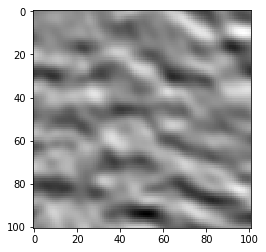

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img

plt.imshow(plt_img.imread('../data/train/images/000e218f21.png'))

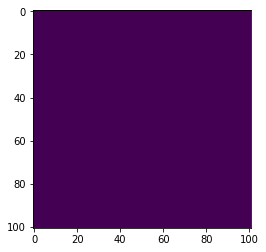

In [22]:
plt.imshow(plt_img.imread('../data/train/masks/000e218f21.png'))

The `train` folder contains two subfolders, `images` and `masks`. The former contains the raw data, the latter contains an image encoding of the ground truth data (where the salt deposit is). Note that this same mask data is contained in the companion `DataFrame` in a run-length encoded format.

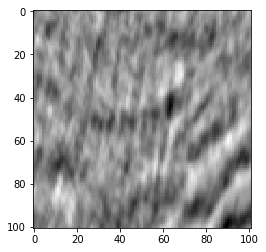

In [23]:
plt.imshow(plt_img.imread('../data/test/images/0005bb9630.png'))

Naturally, no `masks` folder is provided for the `test` data.

The last file included is the `sample_submission` table, which sketches the submission format:

In [25]:
pd.read_csv("../data/sample_submission.csv")

,id,rle_mask
0,155410d6fa,1 1
1,78b32781d1,1 1
2,63db2a476a,1 1
3,17bfcdb967,1 1
4,7ea0fd3c88,1 1
5,8a14fa3b33,1 1
6,1b4836f485,1 1
7,04013dfaae,1 1
8,5a005e1b95,1 1
9,fe53259bf6,1 1


The data is to be submitted in a run length encoded manner. However, the specification of how this encoding works in the competition rules is too short to be coherent. A community member wrote a function which performs a run-length encoding on an image, which through various copypasta ended up in the popular notebook ["Unet with depth"](https://www.kaggle.com/bguberfain/unet-with-depth).

In [26]:
def RLenc(img, order='F', format=True):
    """
    img is binary mask image, shape (r,c)
    order is down-then-right, i.e. Fortran
    format determines if the order needs to be preformatted (according to submission rules) or not

    returns run length as an array or string (if format is True)
    """
    _bytes = img.reshape(img.shape[0] * img.shape[1], order=order)
    runs = []  ## list of run lengths
    r = 0  ## the current run length
    pos = 1  ## count starts from 1 per WK
    for c in _bytes:
        if (c == 0):
            if r != 0:
                runs.append((pos, r))
                pos += r
                r = 0
            pos += 1
        else:
            r += 1

    # if last run is unsaved (i.e. data ends with 1)
    if r != 0:
        runs.append((pos, r))
        pos += r
        r = 0

    if format:
        z = ''

        for rr in runs:
            z += '{} {} '.format(rr[0], rr[1])
        return z[:-1]
    else:
        return runs

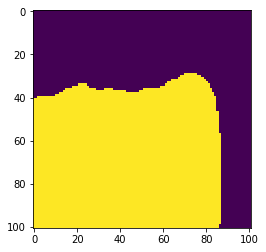

In [32]:
plt.imshow(plt_img.imread('../data/train/masks/217a70a0cb.png'))

By examining the method body we see that the image is meant to be flattened out into a row-major (iterate by rows then by columns, Fortran style) flat whitespaced numerical string (an array join). Each even (or zero) element in this string corresponds with a pixel starting index, and each odd element corresponds with a run length. Because the salt deposits are expected to be contiguous (as here) this encoding scheme is decently efficient.

Let's quickly check that the images are all the same size (they are).

In [39]:
import os
shapes = []

for img_uri in os.listdir("../data/train/images/"):
    shapes.append(plt_img.imread('../data/train/images/217a70a0cb.png').shape)
    
pd.Series(shapes).value_counts()

(101, 101, 3)    4000
dtype: int64

## Simplifying the output space

The raw images and masks are `100x100`. Treating this space properly would require 10,000 output neurons, which requires quite a lot of compute. To make initial prototyping easier, let's subsample the problem. Solving for the pixel mask for each subsection of the overall image is the same as solving for the pixel mask for the image as a whole, so if we split the image into, say, four 50x50 images, we can get away with just 250 output neurons.

Or we can go even simpler and just ask for a "has sand" or "does not have sand" classifier. This would require a single output neuron. I was hoping that I could train a classifier on 10x10 chunks of the images, but unfortunately from inspection it's clear that there isn't enough information in 100 pixel chunks. The major deliniations of sand/not-sand are structural, e.g. global, features.

I don't expect this idea to generalize very well because subselection includes only local features, at the cost of global features. However, whatever we can do with 2,500 pixels we can do with 10,000, it's just a matter of scaling up.

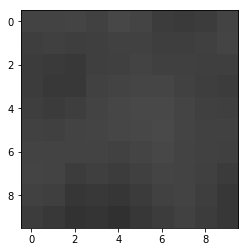

In [46]:
plt.imshow(plt_img.imread('../data/train/images/217a70a0cb.png')[:10,:10])

Not enough information.

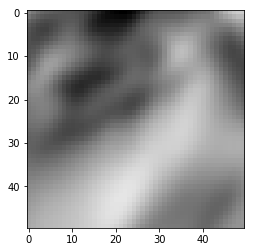

In [48]:
plt.imshow(plt_img.imread('../data/train/images/045c5516a2.png')[:50,:50])

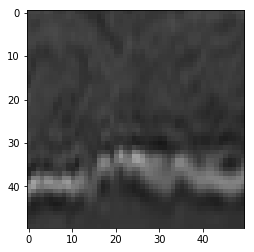

In [45]:
plt.imshow(plt_img.imread('../data/train/images/217a70a0cb.png')[:50,:50])

This is potentially enough information.

This technique may be an interesting way of testing the globalness of features in the dataset, incidentally.

## Classifier 1 &mdash; `100-Out Keras Feedforward`

In [107]:
import numpy as np
from matplotlib.image import imread


class FeaturizeImagesTransform:
    """
    Given a DataFrame whose index is a set of image IDs (as with {train, test}.csv), returns featurized images.
    """
    def __init__(self, x_dim=100, y_dim=100, source='../data/train/images/', mask=False):
        """
        Builds the featurized image transform.
        
        x_dim: int
            The X dimension to crop the images to.
        y_dim: int
            The Y dimension to crop the images to.
        source: str
            Path to the folder containing the image files.
        mask: booleon
            If true, the underlying data is a mask. If false, the underlying data is RGB. If the data is RGB,
            we take just the R component and skip the GB, because the images are grayscale anyway.
        """
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.source = source
        self.mask = mask
        
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        r = np.asarray(
            list(
                map(lambda img_id: np.ravel(
                    imread(f'{self.source}/{img_id}.png')[:self.x_dim,:self.y_dim]
                ), X.index.values)
            )
        )
        return r if self.mask else r[:,::3]


class CutMasksTransform:
    """
    Given a featurized image data mask, returns the result of cutting the image up into some number of pieces.
    """
    def __init__(self, dim=50):
        self.dim = dim
    
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        n_rows = n_cols = (100 // self.dim)
        
        img_subarrs = []
        for X_col in X:
            for arr in np.split(X_col, n_rows):
                img_subarrs.append(np.split(arr, n_rows))
        
        return np.vstack(img_subarrs)


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier


def buildClassifier(dim=50, hidden_nodes=100):
    """Returns the Keras model."""
    def ret():
        clf = Sequential()
        clf.add(Dense(hidden_nodes, activation='relu', input_dim=dim**2))
        clf.add(Dense(dim**2, activation='softmax'))
        clf.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))
        return clf
    return ret

# from sklearn.pipeline import make_pipeline
# X_trans = make_pipeline([
#     FeaturizeImagesTransform(source='../data/train/images/'),
#     CutMasksTransform(dim=50),
#     buildClassifier(dim=50)
# ])

In [108]:
import pandas as pd
train = pd.read_csv("../data/train.csv", index_col="id", usecols=[0])
_depths = pd.read_csv("../data/depths.csv", index_col="id")
train = train.join(_depths)
test = _depths[~_depths.index.isin(train.index)]
del _depths

X = FeaturizeImagesTransform(source='../data/train/images/').transform(train)
X = CutMasksTransform(dim=10).transform(X)
y = FeaturizeImagesTransform(source='../data/train/masks/', mask=True).transform(train)
y = CutMasksTransform(dim=10).transform(y)

In [110]:
clf = KerasClassifier(buildClassifier(dim=10, hidden_nodes=100), epochs=10, batch_size=100)  #, verbose=1)

In [111]:
clf.fit(X, y)

Epoch 1/10
400000/400000 [==============================] - 7s 18us/step - loss: 114.0583
Epoch 2/10
400000/400000 [==============================] - 7s 18us/step - loss: 114.0084
Epoch 3/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.9452
Epoch 4/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.9084
Epoch 5/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.8722
Epoch 6/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.8468
Epoch 7/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.8190
Epoch 8/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.7978
Epoch 9/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.7778
Epoch 10/10
400000/400000 [==============================] - 7s 18us/step - loss: 113.7634


In [3]:
import pandas as pd
train = pd.read_csv("../data/train.csv", index_col="id", usecols=[0])
_depths = pd.read_csv("../data/depths.csv", index_col="id")
train = train.join(_depths)
test = _depths[~_depths.index.isin(train.index)]
del _depths